In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pwd

'C:\\Users\\akumar5\\Documents\\Python Bootcamp\\2021 Python for Machine Learning & Data Science Masterclass\\13-Support-Vector-Machines'

In [3]:
df = pd.read_csv('../DATA/mouse_viral_study.csv')

In [4]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


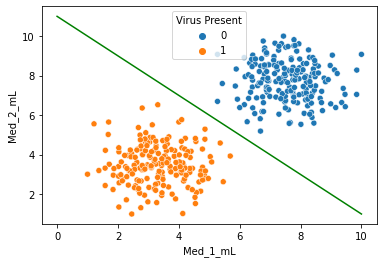

In [10]:
sns.scatterplot(data=df, x='Med_1_mL', y='Med_2_mL', hue='Virus Present')

# Hyperplane in 2D

x = np.linspace(0,10,100)
m = -1
b = 11
y  = m*x +b

plt.plot(x,y,'green')


In [11]:
from sklearn.svm import SVC

In [12]:
X = df.drop('Virus Present', axis=1)

In [13]:
y = df['Virus Present']

In [15]:
model = SVC(kernel='linear', C=1000)

In [16]:
model.fit(X,y)

SVC(C=1000, kernel='linear')

In [17]:
from svm_margin_plot import plot_svm_boundary

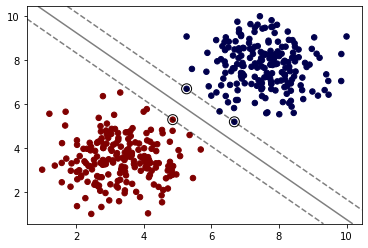

In [18]:
plot_svm_boundary(model, X, y)

In [19]:
model = SVC(kernel='linear', C=0.05)
model.fit(X,y)

SVC(C=0.05, kernel='linear')

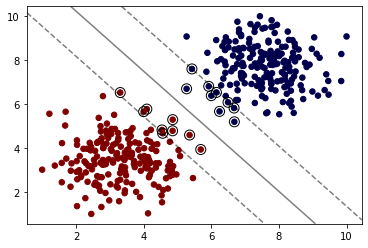

In [20]:
plot_svm_boundary(model, X,y)

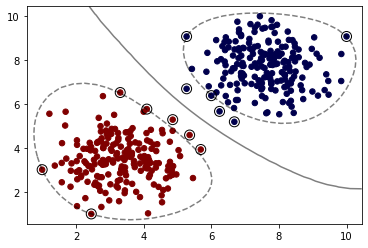

In [29]:
model = SVC(kernel='rbf',C=1, gamma='scale')
model.fit(X,y)
plot_svm_boundary(model, X,y)

In [56]:
X

,Med_1_mL,Med_2_mL
0,6.508231,8.582531
1,4.126116,3.073459
2,6.427870,6.369758
3,3.672953,4.905215
4,1.580321,2.440562
...,...,...
395,2.884122,3.271748
396,7.290855,9.488672
397,7.895325,8.272529
398,2.690592,2.674979


In [57]:
y

0      0
1      1
2      0
3      1
4      1
      ..
395    1
396    0
397    0
398    1
399    0
Name: Virus Present, Length: 400, dtype: int64

In [66]:
from sklearn.model_selection import GridSearchCV

In [88]:
svm = SVC()
param_grid = {'C':[0.01,0.1,0.2,0.5,1,10,100,1000,10000],'kernel':['linear','rbf','sigmoid','poly'],
              'degree':[1,2,3,4,5,6],'gamma':['scale', 'auto', 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.9,1.0, 2.0, 10]}

In [89]:
grid = GridSearchCV(svm,param_grid)

In [90]:
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.2, 0.5, 1, 10, 100, 1000, 10000],
                         'degree': [1, 2, 3, 4, 5, 6],
                         'gamma': ['scale', 'auto', 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.9, 1.0, 2.0, 10],
                         'kernel': ['linear', 'rbf', 'sigmoid', 'poly']})

In [91]:
grid.best_params_

{'C': 0.01, 'degree': 1, 'gamma': 'scale', 'kernel': 'linear'}

In [95]:
svc = SVC(kernel='linear',C=0.01, degree=1,gamma='scale')

In [96]:
svc.fit(X,y)

SVC(C=0.01, degree=1, kernel='linear')

In [97]:
preds = svc.predict(X)

In [100]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [102]:
print(classification_report(y, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       200
           1       1.00      1.00      1.00       200

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



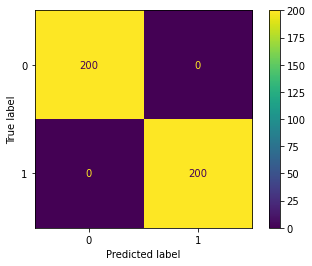

In [106]:
plot_confusion_matrix(svc,X,y)